# Анализ и обработка результатов

В анализе данных важно наглядное представление результатов, чтобы их мог оценить заказчик. Это бизнес, где на кону громадный трафик, серверные мощности, личное время многотысячной аудитории. И одновременно это исследование.

Как в настоящей экспериментальной науке, ответ непредсказуем. Его точность зависит от умелого владения статистическими методами и от качества исходных данных. Перед тем, как начинать считать, проверьте, грамотно ли ваши данные подготовлены.

# Группировка данных

Слово «анализ» означает разбор, рассмотрение с разных сторон. Анализ данных начинают с разделения их на группы по какому-нибудь признаку. Эта операция называется группировка данных. Она помогает изучить материал более подробно, чтобы затем перейти к поиску взаимосвязей между отдельными группами.


Группировка оправданна, если данные чётко делятся по значимому признаку, а полученные группы близки к теме задачи. Например, когда есть данные обо всех покупках в супермаркете, можно смело заниматься группировкой. Так можно установить время наплыва покупателей и решить проблему пиковых нагрузок. Или посчитать средний чек — обычно для магазинов это ключевая метрика.


Стадии группировки хорошо укладываются в словесную формулу **split-apply-combine**:

•	разделить, **split** — разбиение на группы по определённому критерию;

•	применить, **apply** — применение какого-либо метода к каждой группе в отдельности, например, подсчёт численности группы методом count() или суммирование вызовом sum();

•	объединить, **combine** — сведение результатов в новую структуру данных, в зависимости от условий разделения и выполнения метода это бывает DataFrame и Series.

На картинке изображен принцип **split-apply-combine** для таблицы с экзопланетами. Посмотрим, как вообще идут дела с поиском экзопланет. Сначала данные делят по группам, где каждая группа — это год. Потом метод **count()** подсчитывает численность каждой группы. В итоге получаем новую структуру данных с группами, где каждая содержит год и число открытых за этот год экзопланет.

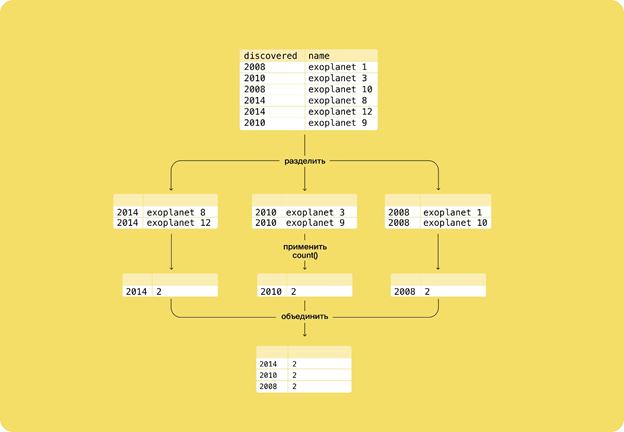

В Рandas для группировки данных есть метод **groupby()**. Он принимает как аргумент название столбца, по которому нужно группировать. В случае с делением экзопланет по годам открытия:

**print(exoplanet.groupby('discovered'))**

**<pandas.core.groupby.DataFrameGroupBy object at 0x7fc1e1ca3400>**


Применение метода **groupby()** к объекту типа DataFrame приводит к созданию объекта особого типа — **DataFrameGroupBy**. Это сгруппированные данные. Если применить к ним какой-нибудь метод Pandas, они станут новой структурой данных типа **DataFrame** или **Series**.
Подсчитаем сгруппированные по годам экзопланеты методом **count()**:

Если нужно сравнить наблюдения по одному показателю, метод применяют к **DataFrameGroupBy** с указанием на один столбец. Нас в первую очередь интересует радиус экзопланет: мы ищем другую Землю. Давайте получим таблицу с единственным столбцом 'radius':

**exo_number = exoplanet.groupby('discovered')['radius'].count()**

**print(exo_number)** 

Получили Series, где по годам открытия расписано количество экзопланет, для которых удалось установить радиус.

Посмотрим, как меняется средний радиус открытых экзопланет год от года. Для этого надо сложить радиусы планет, открытых за определённый год, и поделить на их количество (которое мы уже нашли).

Сумма радиусов считается методом **sum()**:

**exo_radius_sum = exoplanet.groupby('discovered')['radius'].sum()**


**print(exo_radius_sum)**



## Задача
Вашему вниманию предлагается датасет с обзором показателей самоубийств с 1985 по 2016 год — Сравнение социально-экономической информации с показателями самоубийств по годам и странам.

Столбцами этой таблицы являются: страна, год, пол, возрастная группа, количество самоубийств, население, уровень самоубийств, сводный ключ по стране за год, ИЧР (индекс человеческого развития) за год, ВВП за год, ВВП на душу населения, поколение (на основе среднего по возрастной группе).

1. Загрузите таблицу master, содержащую данные о самоубийствах. Выведите на экран таблицу и оцените данные, обратите внимание на названия столбцов, переименуйте их, если это необходимо.

2. Убедитесь в том, что данные прошли предподготовку.  Пропущенные и неопределённые значения выявляет метод isna(), а суммарное количество таких значений — метод sum().

3. Сгруппируйте DataFrame по столбцу country, сохраните полученный результат в переменной country_grouping.

4. Посчитайте количество случаев самоубийств по странам, которые были совершены, методом **sum()**, указав, что выбираем один столбец suicides_no.

Сохраните результат в переменной country_sum и выведите первые 30 строк этой таблицы.



In [ ]:
import pandas as pd
db = pd.read_csv('master.csv')
db.columns
#1
new_names = {'suicides/100k pop': 'suicides_100k_pop', 'country-year': 'country_year', 'HDI for year': 'hdi_for_year', ' gdp_for_year ($) ': 'gdp_for_year', 'gdp_per_capita ($)': 'gdp_per_capita'}

db.rename(columns = new_names, inplace = True)
db.columns
#2
db.isna().sum()
db.duplicated().sum()
db.dropna().reset_index()
#3
country_grouping = db.groupby('country')
#4
country_sum = country_grouping['suicides_no'].sum()
country_sum.head(30)



# Сортировка данных


Поиск необычного в группе — что среди планет, что среди меломанов — это прежде всего поиск чемпионов: объектов с выдающимися показателями по разным статьям. Как всю таблицу, так и отдельные группы изучают, сортируя строки по какому-либо столбцу. 

В Pandas для этой операции есть метод **sort_values()**. У него два аргумента:

• **by = 'имя столбца'** — имя столбца, по которому нужно сортировать;

• **ascending:** по умолчанию True. Для сортировки по убыванию установите значение False.

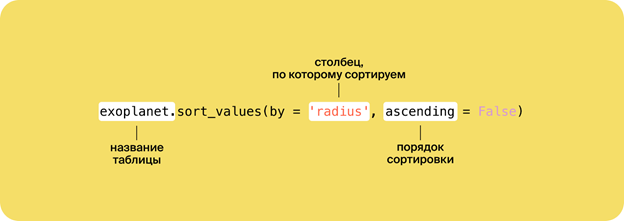


Среди экзопланет интересны близкие по размерам к Земле. Есть ли такие? Отсортируем список по радиусу в порядке возрастания. Тогда в голове таблицы окажутся самые малые, на которых гравитация не прижмёт нас к полу.

**print(exoplanet.sort_values(by='radius').head(30))**

Оказывается, некоторые из уже открытых экзопланет по размерам близки не то что к Земле, но уже и к Луне! Получим список экзопланет с радиусом меньше земного. Смотрите, как логический оператор (здесь это <) задействуется в отборе элементов столбца. Дальше нам этот приём не раз понадобится.

**print(exoplanet[exoplanet['radius'] < 1])**

Но и этот список такой длинный, что изучать его лучше по частям. Экзопланеты, близкие по размерам к Земле, за последнее десятилетие открывали нередко. Можно изучать список открытых за каждый год. Например, для 2014 года (вновь обратите внимание на работу логического оператора, теперь это ==):

**print(exoplanet[exoplanet['discovered'] == 2014])**

А чтобы не тратить время на лишнее, поставим оба условия сразу. Для этого в Pandas есть логический оператор &, подобный оператору and языка Python. Напомним, его смысл на русском языке можно передать словами «и ещё»:

**exo_small_14 = exoplanet[ (exoplanet['radius']<1) & (exoplanet['discovered']==2014)]**

**print(exo_small_14)**

Отсортируем результат в порядке убывания радиуса.

**print(exo_small_14.sort_values(by = 'radius', ascending = False))**





## Задача
1. Выделим пятерки стран с самым низким и самым высоким уровнем самоубийств в мире.

In [ ]:
# 1.
country_sum_sort_up = country_sum.sort_values()
country_sum_sort_down = country_sum.sort_values(ascending=False)
print(f"Пять стран с самым высоким уровнем самоубийств: \n{country_sum_sort_down.head(5)}\n")
print(f"Пять стран с самым низким уровнем самоубийств: \n{country_sum_sort_up.head(5)}\n")

2. Исследуйте распределение количества суидидов по гендерному признаку. Найдите лидеров и антилидеров по количеству самоубийств среди женщин. Повторяется ли картина по сравнению с предыдущим исследованием?

In [ ]:
sex_grouping = new_table.groupby('sex')
sex_sum = sex_grouping['suicides_no'].sum()
print(f"Распределение количества суидидов по гендерному признаку: \n{sex_sum}\n")
# 1. Группируем по странам и полу
country_gender_grouping = new_table.groupby(['country', 'sex'])['suicides_no'].sum().reset_index()

# 2. Извлекаем данные только для женщин
female_suicides_leader = country_gender_grouping[country_gender_grouping['sex'] == 'female'].sort_values(by='suicides_no', ascending=False).head(1)
female_suicides_anti_leader = country_gender_grouping[country_gender_grouping['sex'] == 'female'].sort_values(by='suicides_no').head(1)
print(f"Лидер по количеству самоубийств среди женщин: \n{female_suicides_leader}\n")
print(f"Анти-лидер по количеству самоубийств среди женщин: \n{female_suicides_anti_leader}\n")

# Описательная статистика

Чтобы представить себе среднестатистического самоубийцу, понадобится описательная статистика.

Из её показателей для количественного описания данных в нашей задаче нужны четыре меры — максимум, минимум, медиана и среднее.

Наибольшее и наименьшее обычно вычисляют только по одному признаку. Например, можно получить минимальное и максимальное значение уровня самоубийств (количество самоубийств на 100 тыс.населения) (столбец 'suicides/100k pop'). Для поиска максимума вызывают метод max(), примененный к этому столбцу:

print(master['suicides/100k pop'].max())


In [ ]:
# Вычисляем максимум, минимум, медиану и среднее
max_value = new_table['suicides_div_100k_pop'].max()
min_value = new_table['suicides_div_100k_pop'].min()
median_value = new_table['suicides_div_100k_pop'].median()
mean_value = new_table['suicides_div_100k_pop'].mean()

# Вывод результатов
print(f"Максимальное значение уровня самоубийств: {max_value}")
print(f"Минимальное значение уровня самоубийств: {min_value}")
print(f"Медиана уровня самоубийств: {median_value}")
print(f"Среднее значение уровня самоубийств: {mean_value}")

Самый высокий показатель оказался 224.97 самоубийств на 100 тыс.населения. Интересно, в какой стране такая ситуация.

Запросим из master строку с максимальным значением, прибегнув к логической индексации с условием

**master['suicides/100k pop'] == master['suicides/100k pop'].max()**

In [ ]:
new_table['suicides_div_100k_pop'] == new_table['suicides_div_100k_pop'].max()

Минимальное значение — ищут методом **min()**. Нам интересно установить случаи, когда уровень суицидов минимальный, но не нулевой.

Вот как мы создаём выборку  и находим в ней минимальное значение:

**master_drop_null = master[master['suicides/100k pop'] != 0]**

**print(master_drop_null['suicides/100k pop'].min())** 


In [ ]:
master_drop_null = new_table[new_table['suicides_div_100k_pop'] != 0]

print(master_drop_null['suicides_div_100k_pop'].min())

Получим название самой "счастливой" страны. Как и при поиске максимума, воспользуемся условием и логической индексацией

In [ ]:
new_table[new_table['suicides_div_100k_pop'] == new_table['suicides_div_100k_pop'].min()].head(1)

Результат вывода — две страны, которые соответствуют минимальному значению.
На основе полученных данных можно сделать вывод, что число совершенных самоубийств на 100 тыс. населения  находится в диапазоне от 0,02 до 224.97 секунд, не включая пропущенные.

Это знание пригодится, чтобы разобраться с медианой и средним арифметическим.

Среднее и медиана оценивают значения в центре выборки. Если тех строк, где число с большим количеством самоубийц, столько же, сколько тех, где это число мало — среднее подойдет. Но когда есть оторванные от основной массы лидеры, их результаты сильно смещают значение среднего вверх. Вот почему оценивать в этом случае лучше медианой.

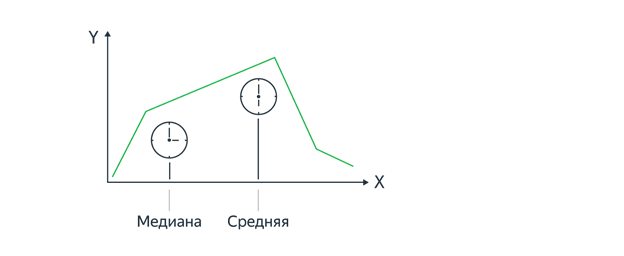

В геометрии медиана делит фигуру на две равные по площади. В статистике она делит выборку пополам: в одной половине значения меньше медианного, в другой больше. Логично, что для определения медианы список обязательно должен быть отсортирован — либо по возрастанию, либо по убыванию.
Когда количество значений нечётное, медиана будет равна тому значению, которое оказалось ровно посередине отсортированного набора. Если же количество данных чётное, то медиана рассчитывается как среднее арифметическое двух соседних чисел в середине набора.



В Pandas есть метод **median()**, который считает медиану. По аналогии с **min()** и **max()** его можно применять ко всей таблице, к отдельному столбцу или к сгруппированным данным. Теперь применим медиану ко всем значениям времени прослушивания в нашей таблице, исключив нулевые:



In [ ]:
new_table['suicides_div_100k_pop'].median()

Чтобы убедиться, что лидеры действительно смещают средний показатель вверх, найдём среднее арифметическое всех этих значений методом mean():

In [ ]:
new_table['suicides_div_100k_pop'].mean()